### IX.A. Случайный лес (Random Forest): Введение

**Ансамблевые методы:** Техники, объединяющие прогнозы нескольких базовых моделей (часто деревьев решений) для получения более точного, стабильного и надежного результата.

**Принцип работы ансамблей:** Уменьшение общей ошибки за счет **снижения дисперсии (variance)**. Ошибки отдельных моделей, обученных немного по-разному, могут компенсировать друг друга при агрегации прогнозов.

**Случайный лес (Random Forest):** Популярный и мощный ансамблевый метод на основе деревьев решений.

**Ключевые идеи построения Случайного Леса:**

1.  **Построение "леса":** Создается ансамбль из множества (`n_estimators`) независимых деревьев решений.
2.  **Бэггинг (Bagging - Bootstrap Aggregating):** Каждое дерево обучается на своей **случайной подвыборке** (бутстрэп-выборке) исходных обучающих данных. Выборка делается **с возвращением**, т.е. некоторые объекты могут попасть в нее несколько раз, а некоторые - ни разу. *Цель: Снижение корреляции между деревьями, уменьшение дисперсии ансамбля.*
3.  **Метод случайных подпространств (Random Subspace Method):** При построении каждого узла дерева для выбора лучшего признака используется не все признаки, а их **случайное подмножество** (например, `sqrt(n_features)`). *Цель: Дальнейшая декорреляция деревьев, повышение разнообразия.*
4.  **Агрегация прогнозов:**
    *   **Классификация:** Итоговый класс определяется **голосованием большинством** (majority voting) по прогнозам всех деревьев.
    *   **Регрессия:** Итоговый прогноз - **среднее арифметическое** прогнозов всех деревьев.

**Преимущества Случайного Леса:**

*   **Высокая точность:** Часто один из самых точных "из коробки" алгоритмов.
*   **Устойчивость к переобучению:** Значительно меньше склонен к переобучению по сравнению с одиночным деревом решений благодаря бэггингу и случайным подпространствам.
*   **Оценка важности признаков:** Позволяет оценить вклад каждого признака в модель.
*   **Эффективен на больших данных:** Хорошо работает с большим числом объектов и признаков.
*   **Не требует масштабирования признаков:** Как и деревья решений.

**Недостатки Случайного Леса:**

*   **"Черный ящик":** Менее интерпретируем, чем одиночное дерево. Сложно понять логику принятия решения ансамблем.
*   **Ресурсоемкость:** Требует больше памяти и времени для обучения и предсказания, чем одиночное дерево (пропорционально числу деревьев).

---

### IX.B. Практический пример и Гиперпараметры

Применим `RandomForestClassifier` из `sklearn` на данных Iris.

Размер обучающей выборки: (105, 4)
Размер тестовой выборки: (45, 4)

Точность RF (по умолчанию) на тесте: 0.8889

Влияние n_estimators:
n_estimators:   5, Test Accuracy: 0.9111
n_estimators:  10, Test Accuracy: 0.9111
n_estimators:  20, Test Accuracy: 0.9111
n_estimators:  50, Test Accuracy: 0.8889
n_estimators: 100, Test Accuracy: 0.8889
n_estimators: 200, Test Accuracy: 0.9111


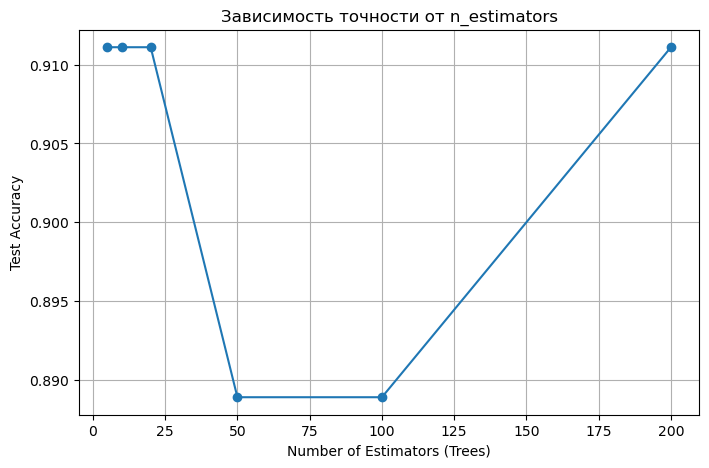


Влияние max_depth:
Max depth: 1, Test Accuracy: 0.8889
Max depth: 2, Test Accuracy: 0.9111
Max depth: 3, Test Accuracy: 0.9111
Max depth: 4, Test Accuracy: 0.8889
Max depth: 5, Test Accuracy: 0.8889
Max depth: 6, Test Accuracy: 0.8889
Max depth: 7, Test Accuracy: 0.8889
Max depth: 8, Test Accuracy: 0.8889


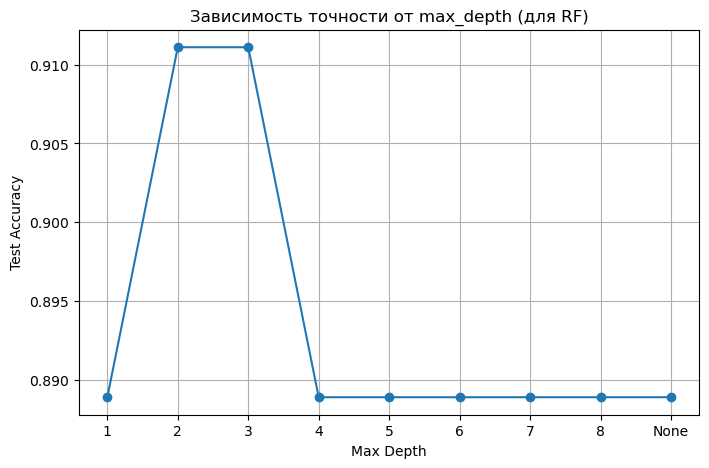

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt # Добавим для будущих графиков, если понадобятся

# 1. Загрузка и разделение данных
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names # Сохраним для Feature Importance
# Разделим данные (можно взять больше для обучения, если нужно)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f'Размер обучающей выборки: {X_train.shape}')
print(f'Размер тестовой выборки: {X_test.shape}')

# 2. Обучение модели с параметрами по умолчанию
# По умолчанию n_estimators=100 в sklearn >= 0.22
rf_clf_default = RandomForestClassifier(random_state=42)
rf_clf_default.fit(X_train, y_train)

# Оценка модели по умолчанию
y_pred_default = rf_clf_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f'\nТочность RF (по умолчанию) на тесте: {accuracy_default:.4f}')

# 3. Эксперименты с гиперпараметрами

# 3.1 Влияние количества деревьев (n_estimators)
print("\nВлияние n_estimators:")
n_estimators_list = [5, 10, 20, 50, 100, 200]
test_accuracies_n = []

for n_est in n_estimators_list:
    rf_clf_n = RandomForestClassifier(n_estimators=n_est, random_state=42)
    rf_clf_n.fit(X_train, y_train)
    y_pred_n = rf_clf_n.predict(X_test)
    acc_n = accuracy_score(y_test, y_pred_n)
    test_accuracies_n.append(acc_n)
    print(f'n_estimators: {n_est:3d}, Test Accuracy: {acc_n:.4f}')

# Визуализация влияния n_estimators
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, test_accuracies_n, marker='o')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Test Accuracy')
plt.title('Зависимость точности от n_estimators')
plt.grid(True)
plt.show()
# Ожидаемый результат: Точность растет с увеличением n_estimators и стабилизируется.

# 3.2 Влияние максимальной глубины деревьев (max_depth)
print("\nВлияние max_depth:")
max_depths_rf = range(1, 9) # Включаем None позже или делаем отдельную точку
test_accuracies_depth_rf = []

for depth in max_depths_rf:
    rf_clf_depth = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=42) # Фиксируем n_estimators
    rf_clf_depth.fit(X_train, y_train)
    y_pred_rf_depth = rf_clf_depth.predict(X_test)
    acc_rf_depth = accuracy_score(y_test, y_pred_rf_depth)
    test_accuracies_depth_rf.append(acc_rf_depth)
    print(f'Max depth: {depth}, Test Accuracy: {acc_rf_depth:.4f}')

# Добавим случай для None (без ограничения глубины), он уже есть в rf_clf_default
test_accuracies_depth_rf.append(accuracy_default)
max_depths_rf_plot = list(max_depths_rf) + [max_depths_rf[-1] + 1] # Псевдо-значение для None на графике
x_ticks_labels = [str(d) for d in max_depths_rf] + ['None']

# Визуализация влияния max_depth
plt.figure(figsize=(8, 5))
plt.plot(max_depths_rf_plot, test_accuracies_depth_rf, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Test Accuracy')
plt.title('Зависимость точности от max_depth (для RF)')
plt.xticks(ticks=max_depths_rf_plot, labels=x_ticks_labels)
plt.grid(True)
plt.show()
# Ожидаемый результат: RF менее чувствителен к max_depth, чем одно дерево,
# но очень малая глубина может привести к недообучению.

### IX.C. Важность Признаков (Feature Importance)

Случайный лес позволяет оценить, какой вклад внес каждый признак в построение модели. Это полезно для понимания данных и отбора наиболее значимых признаков. В `sklearn` эта информация доступна через атрибут `feature_importances_` обученной модели.


Важность признаков:


,Feature,Importance
3,petal width (cm),0.454892
2,petal length (cm),0.400227
0,sepal length (cm),0.120608
1,sepal width (cm),0.024273


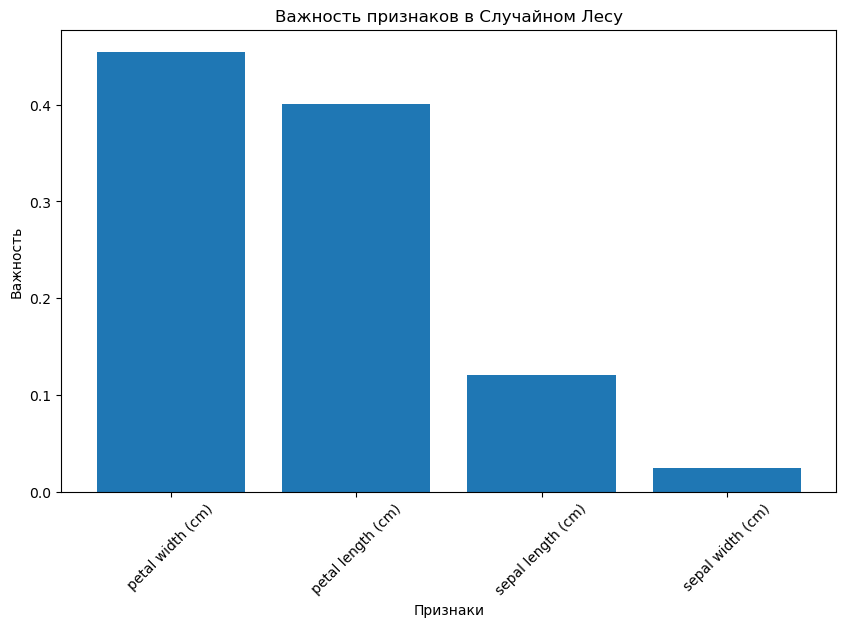

In [3]:
# Получение и отображение важности признаков (используем модель по умолчанию rf_clf_default)
importances = rf_clf_default.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nВажность признаков:")
# Используем display для красивого вывода в Jupyter/Colab, иначе print
try:
    display(feature_importance_df)
except NameError:
    print(feature_importance_df)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков в Случайном Лесу')
plt.xticks(rotation=45)
plt.show()

*Наблюдение:* На данных Iris признаки длины и ширины лепестка (`petal length`, `petal width`) обычно оказываются наиболее важными.

---

**Краткое резюме:**

*   Случайный лес - ансамбль деревьев, использующий бэггинг и случайные подпространства признаков для декорреляции деревьев и уменьшения дисперсии.
*   Обычно обеспечивает высокую точность и устойчивость к переобучению.
*   Основные гиперпараметры: `n_estimators` (число деревьев) и параметры регуляризации отдельных деревьев (`max_depth` и др.).
*   Позволяет оценивать важность признаков.

---